In [1]:
!pip install osmnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.2/102.2 kB 2.8 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing the necessary libraries
import osmnx as ox
import networkx as nx
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# set blanket crs
crs = 'EPSG:2124'

In [4]:
# Christchurch Network
place_name = "Christchurch, New Zealand"

graph = ox.graph_from_place(place_name, network_type='drive')

In [5]:
# Converting the edges of the graph to a Geodataframe
edges = ox.graph_to_gdfs(graph, nodes=False, edges=True)

In [6]:
# Locating all of the schools in Melbourne
schools_chch = ox.features_from_place(place_name, tags={'amenity':'school'})

# Locating all of the hospitals in Melbourne
hospitals_chch = ox.features_from_place(place_name, tags={'amenity':'hospital'})

# Locating all of the supermarkets in Melbourne
supermarkets_chch = ox.features_from_place(place_name, tags={'shop':'supermarket'})

In [7]:
area = ox.geocode_to_gdf(place_name)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
#Setting up the north arrow
def add_north_arrow(ax):

  py =0.6 * ax.figure.bbox.height
  px =0.98 * ax.figure.bbox.width

  # Draw an arrow with a text "N" above it using annotation
  ax.annotate("N", xy=(px, py), fontsize=30, xycoords="figure pixels")
  ax.annotate("",  xy=(px,  py), xytext=(px, py-40),xycoords="figure pixels",
          arrowprops=dict(arrowstyle="-|>", facecolor="black"))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<ipython-input-9-1766ff6a1641>:22: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  fig.legend(bbox_to_anchor=(0.9, 0.65), loc='upper left', borderaxespad=0.)


Text(0.5, 107.67873833538603, 'Longitude')

<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


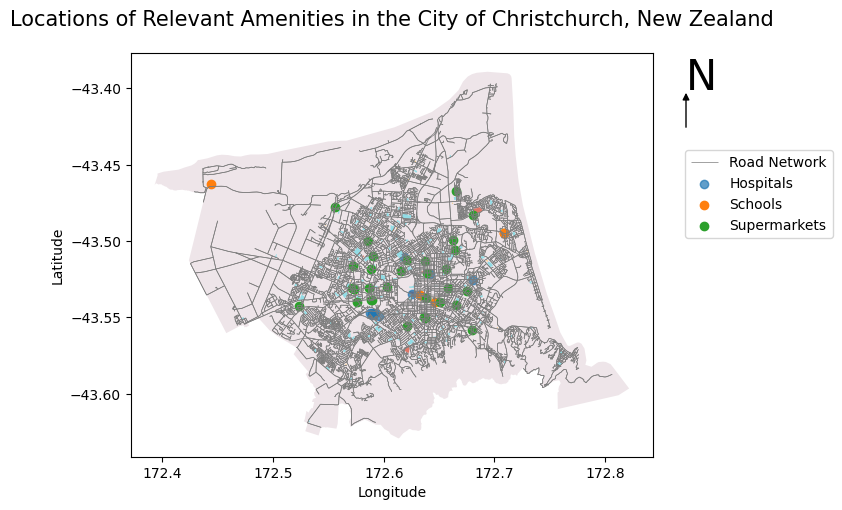

In [9]:
# Visualise in a single figure all the OSM data that was foud:
# Create a figure and an axis for plotting, and set the figure size
fig, ax = plt.subplots(figsize=(7, 7))

# Plot each of the GeoDataFrames on the plotting axis to ensure they are all on the same figure
# Plot the 'area' GeoDataFrame with black face color
area.plot(ax=ax, facecolor="#EEE5E9")

# edges geodataframe
edges.plot(ax=ax, linewidth=0.5, edgecolor="#7C7C7C", label='Road Network')

# hospitals geodataframe
hospitals_chch.plot(ax=ax, facecolor="#D64933", alpha=0.7, label='Hospitals')

# Schools geodataframe
schools_chch.plot(ax=ax, facecolor="#92DCE5", label='Schools')

# supermarkets geodataframe
supermarkets_chch.plot(ax=ax, facecolor='#FFBF46', label='Supermarkets')

ax.set_title('Locations of Relevant Amenities in the City of Christchurch, New Zealand', fontsize=15, pad = 20)
fig.legend(bbox_to_anchor=(0.9, 0.65), loc='upper left', borderaxespad=0.)
add_north_arrow(ax)
fig.tight_layout()
plt.ylabel('Latitude', fontsize=10)
plt.xlabel('Longitude', fontsize=10)

In [10]:
# First, chck the CRS of the data
hospitals_chch.crs

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

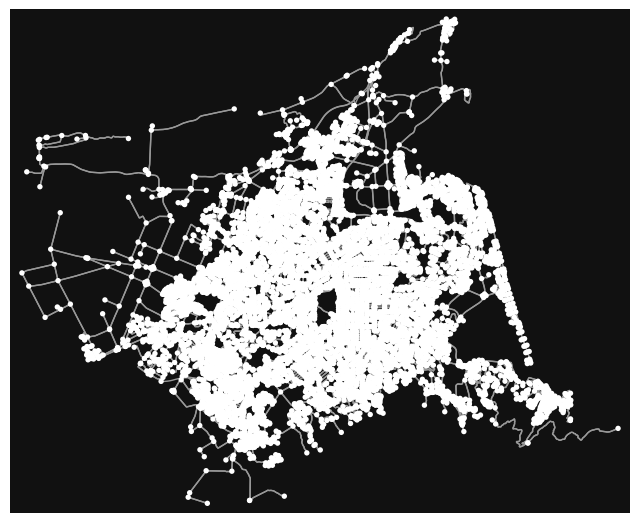

In [11]:
graph_proj = ox.project_graph(graph, to_crs=crs)
fig, ax = ox.plot_graph(graph_proj)

In [12]:
nodes_proj, edges_proj = ox.graph_to_gdfs(graph_proj, nodes=True, edges=True)
print("Coordinate system:", edges_proj.crs)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Coordinate system: EPSG:2124


In [13]:
# Reprojecting the Amenities

# Schools:
schools_proj = schools_chch.to_crs(crs)

# Hospitals:
hospitals_proj = hospitals_chch.to_crs(crs)

# Supermarkets:
supermarkets_proj = supermarkets_chch.to_crs(crs)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
# adding x and y values to the geodataframe
schools_proj['x'] = schools_proj.geometry.centroid.x

schools_proj['y'] = schools_proj.geometry.centroid.y

In [15]:
schools_proj.head(3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:

geometry amenity  \
element_type osmid                                               
node         2746776461  POINT (392383.858 806154.616)  school   
             5474391444  POINT (377101.894 814146.867)  school   
             5474401279  POINT (393459.567 805655.472)  school   

                                                    name     addr:city  \
element_type osmid                                                       
node         2746776461  Southern Regional Health School           NaN   
             5474391444           National Trade Academy  Christchurch   
             5474401279                   Marian College  Christchurch   

                                 addr:street addr:country addr:housenumber  \
element_type osmid                                                           
node         2746776461                  NaN          NaN              NaN   
             5474391444  Mcleans Island Road          NaN              NaN   
             5474401279     Barbadoes Street           NZ              122   

                        addr:postcode denomination   religion  ...  \
element_type osmid                                             ...   
node         2746776461           NaN          NaN        NaN  ...   
             5474391444           NaN          NaN        NaN  ...   
             5474401279          8011     catholic  christian  ...   

                        internet_access opening_hours accessibility parking  \
element_type osmid                                                            
node         2746776461             NaN           NaN           NaN     NaN   
             5474391444             NaN           NaN           NaN     NaN   
             5474401279             NaN           NaN           NaN     NaN   

                        roof_pitch building addr:housename check_date  \
element_type osmid                                                      
node         2746776461        NaN      NaN            NaN        NaN   
             5474391444        NaN      NaN            NaN        NaN   
             5474401279        NaN      NaN            NaN        NaN   

                                     x              y  
element_type osmid                                     
node         2746776461  392383.858399  806154.615634  
             5474391444  377101.894081  814146.866809  
             5474401279  393459.567195  805655.472043  

[3 rows x 50 columns]

In [16]:
# finding the list of network nodes closest to each school
school_node_ids = ox.distance.nearest_nodes(graph_proj, schools_proj['x'], schools_proj['y'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
# ensuring all data is accounted for
len(school_node_ids) == len(schools_proj)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


True

In [18]:
#Create heatmaps
# Finding travel times for each node and school
schools, routes = nx.multi_source_dijkstra(graph_proj, school_node_ids, weight='length')

# set travel_time in minutes as attribute to each network node
for node_id in schools:
    graph_proj.nodes.get(node_id)["length"] = schools[node_id]

# get nodes and edges as Geo data frame
gdf_nodes_schools, gdf_edges_schools = ox.graph_to_gdfs(graph_proj)

In [19]:
!pip install contextily

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 55.6 MB/s eta 0:00:00


<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
/usr/local/lib/python3.10/dist-packages/google/colab/_pip.py:85: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.10/dist-packages/contextily-1.4.0.dist-info/top_level.txt' mode='r' encoding='UTF-8'>
  for line in open(toplevel):
/usr/local/lib/python3.10/dist-packages/google/colab/_pip.py:85: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr

In [20]:
#Setting up the north arrow
def add_north_arrow2(ax):

  py =0.85 * ax.figure.bbox.height
  px =0.8 * ax.figure.bbox.width

  # Draw an arrow with a text "N" above it using annotation
  ax.annotate("N", xy=(px, py), fontsize=30, xycoords="figure pixels")
  ax.annotate("",  xy=(px,  py), xytext=(px, py-40),xycoords="figure pixels",
          arrowprops=dict(arrowstyle="-|>", facecolor="black"))

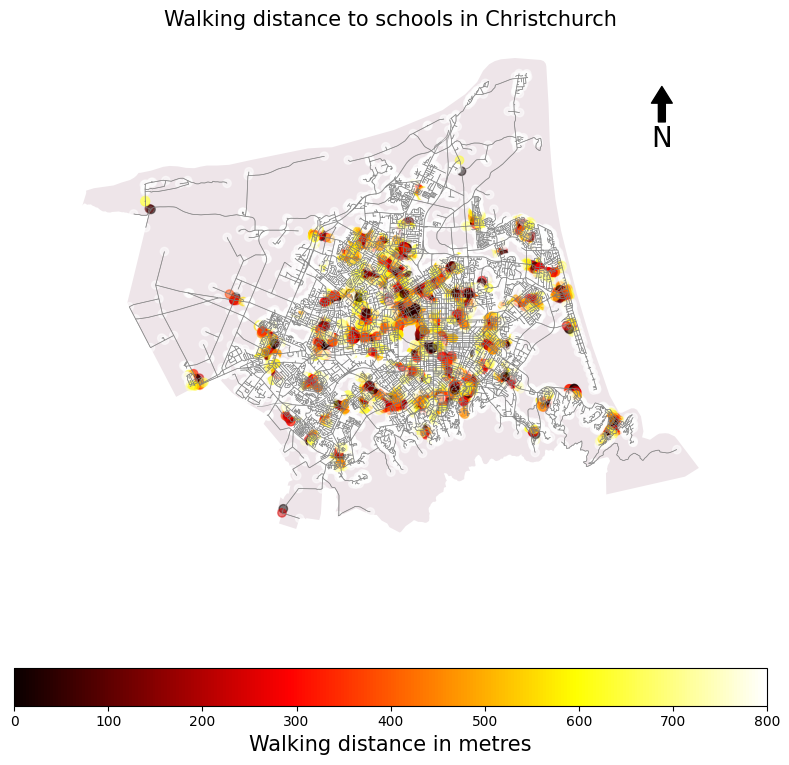

In [35]:
# Creating a heatmap of travel times
area = area.to_crs(crs)
edges = edges.to_crs(crs)
# Importing more required libraries
from io import BytesIO
from urllib.request import urlopen
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import contextily as ctx

# adding travel time based on maximum speed
graph_proj = ox.add_edge_speeds(graph_proj)
graph_proj = ox.add_edge_travel_times(graph_proj)
# get edges as a geodataframe
gdf_edges = ox.graph_to_gdfs(graph_proj)

# define color scale using minimum and maximum walking distances in metres
norm = mcolors.TwoSlopeNorm(vmin=0, vcenter=400, vmax=800)

fig = plt.figure(figsize=(8,8))
ax = plt.axes()
# hide x and y axis
ax.set_axis_off()

area.plot(ax=ax, facecolor="#EEE5E9")

# edges geodataframe
edges.plot(ax=ax, linewidth=0.5, edgecolor="#7C7C7C", label='Road Network', alpha=.7)

# add colotbat showing travel time and corresponding colour
cb = fig.colorbar(cm.ScalarMappable(norm=norm, cmap="hot"),
    ax=ax, orientation='horizontal')

# plot each node with color indicating travel time
gdf_nodes_schools.plot(ax=ax,
    column="length", cmap="hot", norm=norm, alpha=.5)

x, y, arrow_length = 0.9, 0.9, 0.1
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=ax.transAxes)

cb.set_label('Walking distance in metres', fontsize = 15)

ax.set_title('Walking distance to schools in Christchurch', fontsize=15)
fig.tight_layout()

In [36]:
# adding x and y values to the geodataframe
hospitals_proj['x'] = hospitals_proj.geometry.centroid.x

hospitals_proj['y'] = hospitals_proj.geometry.centroid.y

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [37]:
# finding the list of network nodes closest to each school
hospital_node_ids = ox.distance.nearest_nodes(graph_proj, hospitals_proj['x'], hospitals_proj['y'])

In [38]:
#Create heatmaps
# Finding travel times for each node and school
hospitals, routes = nx.multi_source_dijkstra(graph_proj, hospital_node_ids, weight='length')

# set travel_time in minutes as attribute to each network node
for node_id in hospitals:
    graph_proj.nodes.get(node_id)["length"] = hospitals[node_id]

# get nodes and edges as Geo data frame
gdf_nodes_hospitals, gdf_edges_hospitals = ox.graph_to_gdfs(graph_proj)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

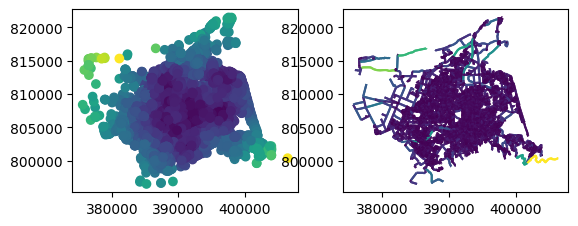

In [39]:
fig, (ax1, ax2) = plt.subplots(1,2)

gdf_nodes_hospitals.plot(ax=ax1, column=gdf_nodes_hospitals['length'])
gdf_edges_hospitals.plot(ax=ax2, column=gdf_edges_hospitals['length'])

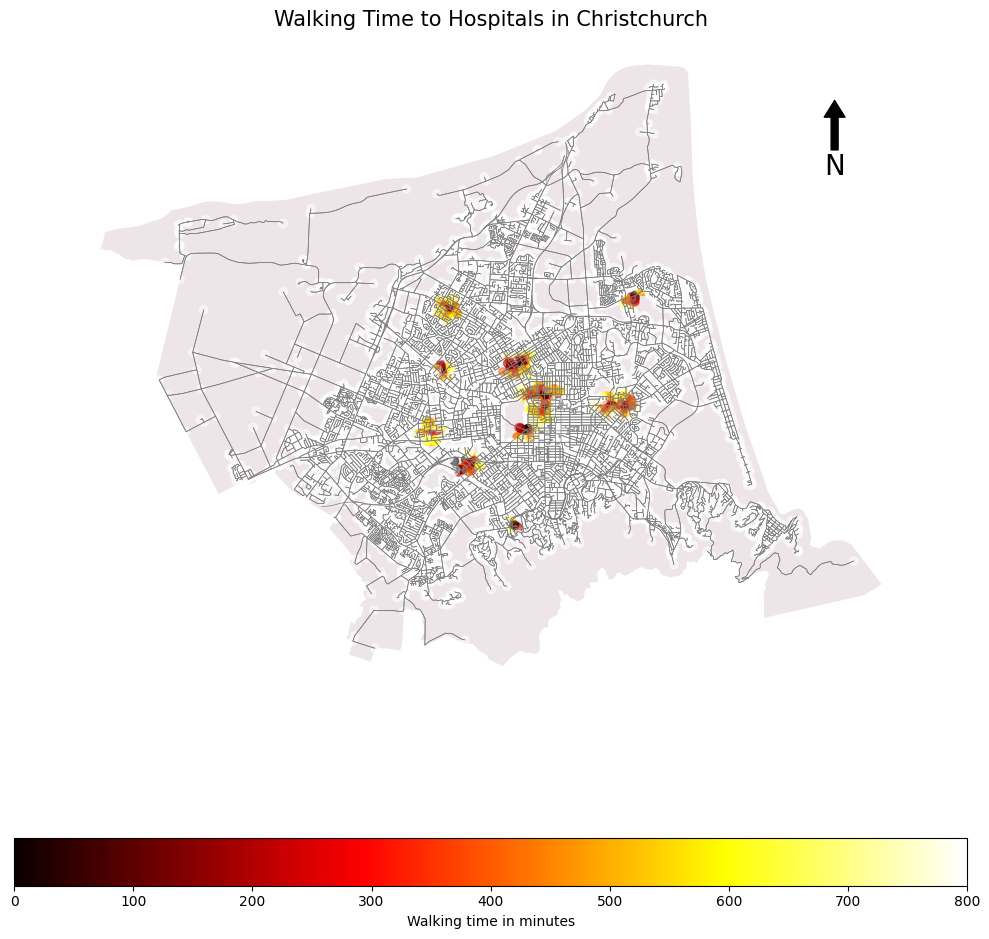

In [48]:
# Importing more required libraries
from io import BytesIO
from urllib.request import urlopen
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import contextily as ctx

area = area.to_crs(crs)
edges = edges.to_crs(crs)

# define color scale using minimum and maximum travel times
norm = mcolors.TwoSlopeNorm(vmin=0, vcenter=400, vmax=800)

fig = plt.figure(figsize=(10,10))
ax = plt.axes()
# hide x and y axis
ax.set_axis_off()

area.plot(ax=ax, facecolor="#EEE5E9")

# edges geodataframe
edges.plot(ax=ax, linewidth=0.5, edgecolor="#7C7C7C", label='Road Network')

# add colotbat showing travel time and corresponding colour
cb = fig.colorbar(cm.ScalarMappable(norm=norm, cmap="hot"),
    ax=ax, orientation='horizontal')

# plot each node with color indicating travel time
gdf_nodes_hospitals.plot(ax=ax,
    column="length", cmap="hot", norm=norm, alpha=.5)

x, y, arrow_length = 0.9, 0.9, 0.1
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=ax.transAxes)

cb.set_label('Walking time in minutes', fontsize = 10)
ax.set_title('Walking Time to Hospitals in Christchurch', fontsize=15)
fig.tight_layout()

In [41]:
# adding x and y values to the geodataframe
supermarkets_proj['x'] = supermarkets_proj.geometry.centroid.x

supermarkets_proj['y'] = supermarkets_proj.geometry.centroid.y

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [42]:
# finding the list of network nodes closest to each school
supermarkets_node_ids = ox.distance.nearest_nodes(graph_proj, supermarkets_proj['x'], supermarkets_proj['y'])

In [43]:
#Create heatmaps
# Finding travel times for each node and school
supermarket, routes = nx.multi_source_dijkstra(graph_proj, supermarkets_node_ids, weight='length')

# set travel_time in minutes as attribute to each network node
for node_id in supermarket:
    graph_proj.nodes.get(node_id)["length"] = supermarket[node_id]

# get nodes and edges as Geo data frame
gdf_nodes_supermarket, gdf_edges_supermarket = ox.graph_to_gdfs(graph_proj)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 1.0, 'Walking distance to Supermarkets in Christchurch')

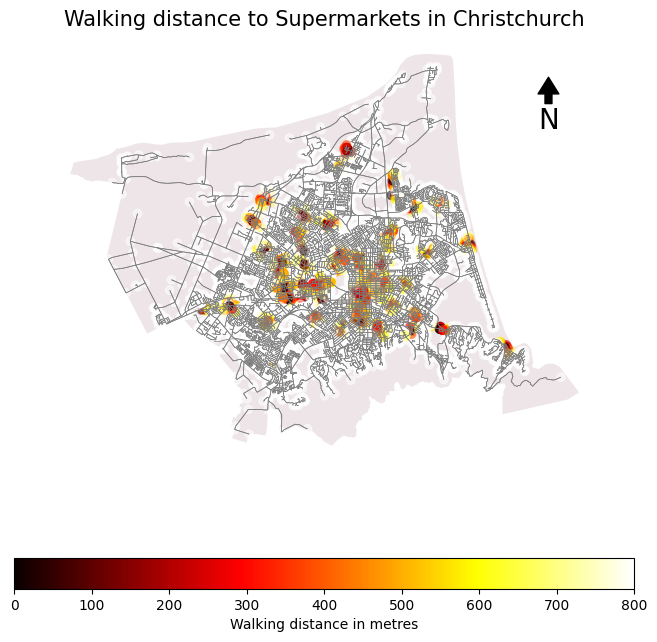

In [46]:
# Creating a heatmap of travel times

# Importing more required libraries
from io import BytesIO
from urllib.request import urlopen
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import contextily as ctx

# adding travel time based on maximum speed
graph_proj = ox.add_edge_speeds(graph_proj)
graph_proj = ox.add_edge_travel_times(graph_proj)
# get edges as a geodataframe
gdf_edges = ox.graph_to_gdfs(graph_proj)

# define color scale using minimum and maximum walking distances in metres
norm = mcolors.TwoSlopeNorm(vmin=0, vcenter=400, vmax=800)

fig = plt.figure(figsize=(8,8))
ax = plt.axes()
# hide x and y axis
ax.set_axis_off()
area.plot(ax=ax, facecolor="#EEE5E9")

# edges geodataframe
edges.plot(ax=ax, linewidth=0.5, edgecolor="#7C7C7C", label='Road Network')

# add colotbat showing travel time and corresponding colour
cb = fig.colorbar(cm.ScalarMappable(norm=norm, cmap="hot"),
    ax=ax, orientation='horizontal')

# plot each node with color indicating travel time
gdf_nodes_supermarket.plot(ax=ax,
    column="length", cmap="hot", norm=norm, alpha=.5)

x, y, arrow_length = 0.9, 0.9, 0.1
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=ax.transAxes)

#gdf_edges.plot(ax=ax)
cb.set_label('Walking distance in metres', fontsize = 10)

ax.set_title('Walking distance to Supermarkets in Christchurch', fontsize=15)
#fig.tight_layout()

# Saving data to files

In [45]:
# Drop list columns from each dataset
hospitals_proj = hospitals_proj.drop(columns=['ways', 'nodes'])
schools_proj = schools_proj.drop(columns=['nodes'])
supermarkets_proj = supermarkets_proj.drop(columns=['ways', 'nodes'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


KeyError: ignored

In [ ]:
# Hospitals
hospitals_proj.to_file('/content/drive/MyDrive/FinalProject/Data/amenities/Christchurch/hospitals.gpkg', driver='GPKG')

# Schools
schools_proj.to_file('/content/drive/MyDrive/FinalProject/Data/amenities/Christchurch/schools.gpkg', driver='GPKG')

# Supermarkets
supermarkets_proj.to_file('/content/drive/MyDrive/FinalProject/Data/amenities/Christchurch/supermarkets.gpkg', driver='GPKG')